In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,NaN,NaN,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             21
Age                10
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

### There are 21 null values in age and 10 in age, however the record of the data is 10,000
### we can drop the rows due to v.very small amount of null values however in my test I have
### condition not to drop the values

In [5]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [6]:
df["Gender"] = df["Gender"].fillna("Male")

In [7]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Handle Outliers in The Data

<Axes: xlabel='Balance', ylabel='Density'>

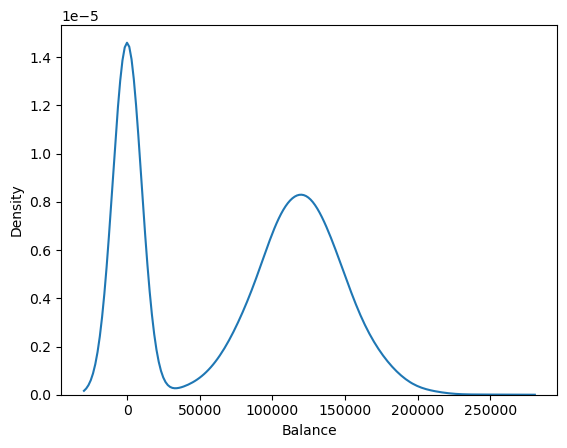

In [9]:
# for example doing for balance
sns.kdeplot(df.Balance)

In [10]:
# Function to find outliers in one dimensional dataset

def find_anomalies(data):
    anomalies = []
    std = statistics.stdev(data)
    mean = statistics.mean(data)

    anomalies_cut = 3 * std

    upper_limit = mean + anomalies_cut
    lower_limit = mean - anomalies_cut

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.push(outlier)

    return anomalies

In [11]:
outliers = find_anomalies(df.Balance)

In [16]:
print(len(outliers)) 
print(len(df.Balance))

0
10000


In [15]:
df.Balance.skew()

np.float64(-0.14110871094154384)

### Conclusion: No anomaly found